In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('income.csv')
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [46]:
df.isna().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

<Axes: xlabel='count', ylabel='Location'>

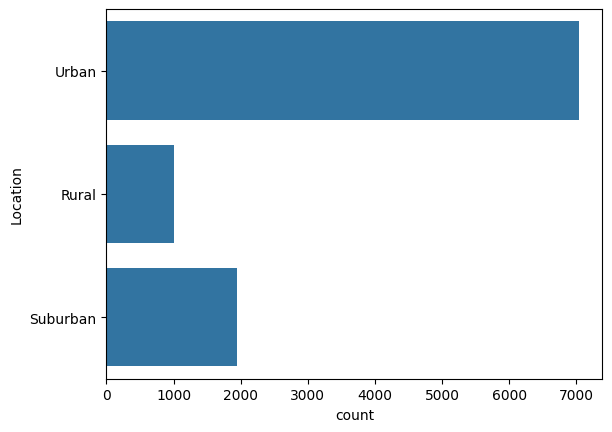

In [47]:
sns.countplot(df['Location'])

In [48]:
y = df.pop("Income")

In [49]:
x = pd.get_dummies(df,drop_first=True,dtype=int)

In [50]:
x

,Age,Number_of_Dependents,Work_Experience,Household_Size,Education_Level_Doctorate,Education_Level_High School,Education_Level_Master's,Occupation_Finance,Occupation_Healthcare,Occupation_Others,...,Marital_Status_Single,Employment_Status_Part-time,Employment_Status_Self-employed,Homeownership_Status_Rent,Type_of_Housing_Single-family home,Type_of_Housing_Townhouse,Gender_Male,Primary_Mode_of_Transportation_Car,Primary_Mode_of_Transportation_Public transit,Primary_Mode_of_Transportation_Walking
0,56,5,21,7,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,69,0,4,7,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,46,1,1,7,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,32,2,32,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,60,3,15,4,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,26,6,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
9996,23,3,16,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9997,41,3,50,4,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
9998,44,0,3,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [52]:
grad = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1)
grad.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=1000)

In [53]:
rfr = RandomForestRegressor(n_estimators=100,oob_score=True)
rfr.fit(x_train,y_train)

RandomForestRegressor(oob_score=True)

In [54]:
train_pred = grad.predict(x_train)
test_pred = grad.predict(x_test)

In [55]:
print("Gradient Boosting:")
print("Train Report")
print(r2_score(y_train,train_pred))

print("Test Report")
print(r2_score(y_test,test_pred))

Gradient Boosting:
Train Report
0.2439880493311798
Test Report
-0.01351601056804519


In [56]:
train_pred = rfr.predict(x_train)
test_pred = rfr.predict(x_test)

In [57]:
print("Random Forest:")
print("Train Report")
print(r2_score(y_train,train_pred))

print("Test Report")
print(r2_score(y_test,test_pred))

Random Forest:
Train Report
0.8626983989577812
Test Report
0.045835008513933406
